In [27]:
%reset -f

In [28]:
#!/usr/bin/env python3
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import torch
from torch import nn
from torch.utils.data import DataLoader
from torcheval.metrics import BinaryAccuracy
from torcheval.metrics.functional import binary_accuracy
torch.manual_seed(18)
torch.cuda.is_available()
from DiscriminatorV3 import DiscriminatorV3, ConvBlock
from DiscriminatorV4 import DiscriminatorV4, ConvBlock
from FacesDataset import FacesDataset

In [29]:
training_set = FacesDataset('datasets/train.csv')

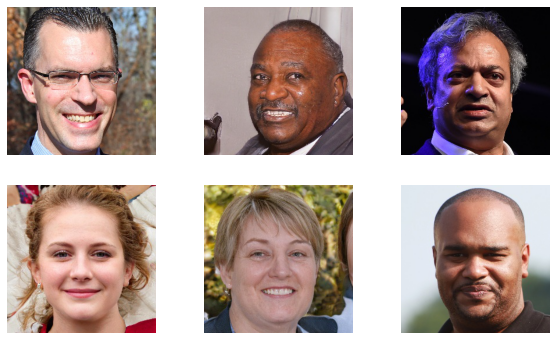

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Read CSV file
df = pd.read_csv('datasets/train.csv')

# Select 6 random images
sample_df = df.sample(n=6, random_state=1)

# Create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Loop over the axes and plot images
for i, axi in enumerate(ax.flat):
    path = sample_df.iloc[i]['path']
    img = Image.open(path)
    axi.imshow(img)
    axi.set_axis_off()

# Show the figure
plt.show()

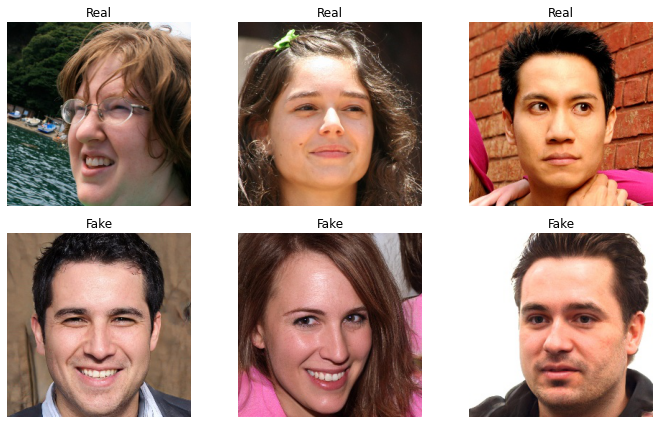

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/train.csv')

real_images = df[df['label'] == 1].sample(3)['path'].tolist()
fake_images = df[df['label'] == 0].sample(3)['path'].tolist()

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.flatten()

for i in range(6):
    if i < 3:
        img_path = real_images[i]
        title = 'Real'
    else:
        img_path = fake_images[i-3]
        title = 'Fake'
    
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

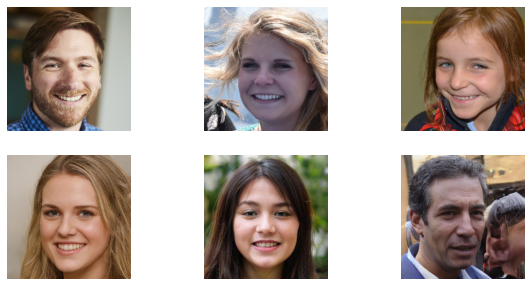

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

df = pd.read_csv('datasets/train.csv')

real_images = df[df['label'] == 1].sample(3)
fake_images = df[df['label'] == 0].sample(3)

fig, axs = plt.subplots(2, 3, figsize=(10, 5))

for i, (idx, row) in enumerate(real_images.iterrows()):
    img = Image.open(row['path'])
    axs[0, i].imshow(img)
    axs[0, i].axis('off')

for i, (idx, row) in enumerate(fake_images.iterrows()):
    img = Image.open(row['path'])
    axs[1, i].imshow(img)
    axs[1, i].axis('off')

plt.show()

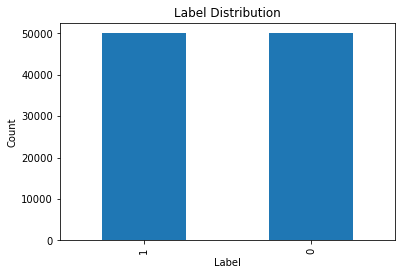

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv('datasets/train.csv')

# Count the number of occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

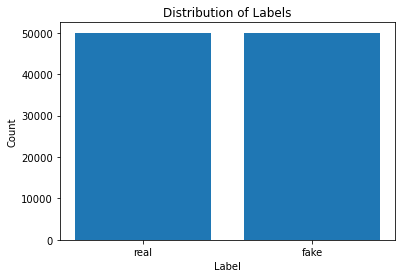

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/train.csv')

df['label'] = df['label'].replace({1: 'real', 0: 'fake'})

label_counts = df['label'].value_counts()

plt.bar(label_counts.index, label_counts.values)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

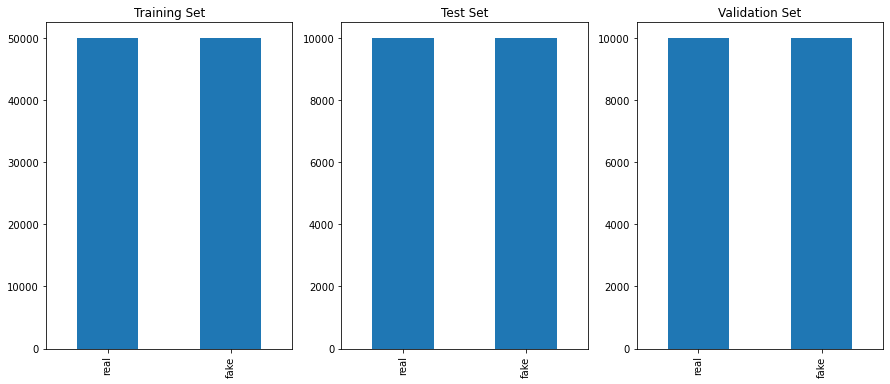

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
val_df = pd.read_csv("datasets/valid.csv")

# Map the label values to their corresponding names
label_map = {1: "real", 0: "fake"}
train_df["label"] = train_df["label"].map(label_map)
test_df["label"] = test_df["label"].map(label_map)
val_df["label"] = val_df["label"].map(label_map)

# Create the figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Plot the distributions for each dataset
train_df["label"].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Training Set")

test_df["label"].value_counts().plot(kind="bar", ax=axs[1])
axs[1].set_title("Test Set")

val_df["label"].value_counts().plot(kind="bar", ax=axs[2])
axs[2].set_title("Validation Set")

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=1.0)

# Show the figure
plt.show()

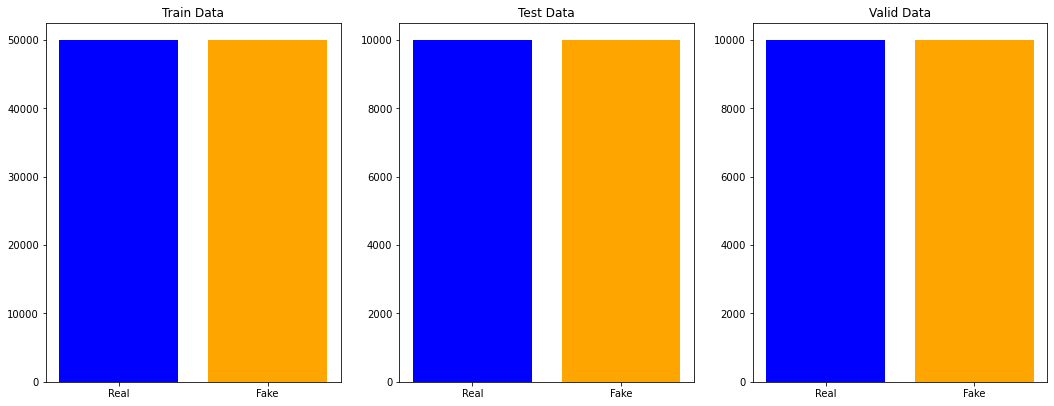

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
valid_data = pd.read_csv('datasets/valid.csv')

# count the number of real and fake images for each dataset
train_counts = train_data['label'].value_counts()
test_counts = test_data['label'].value_counts()
valid_counts = valid_data['label'].value_counts()

# create a figure with three subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# plot the bar chart for the train dataset
axs[0].bar(['Real', 'Fake'], [train_counts[1], train_counts[0]], color=['blue', 'orange'])
axs[0].set_title('Train Data')

# plot the bar chart for the test dataset
axs[1].bar(['Real', 'Fake'], [test_counts[1], test_counts[0]], color=['blue', 'orange'])
axs[1].set_title('Test Data')

# plot the bar chart for the valid dataset
axs[2].bar(['Real', 'Fake'], [valid_counts[1], valid_counts[0]], color=['blue', 'orange'])
axs[2].set_title('Valid Data')

# add some space between the subplots
fig.tight_layout(pad=2)

# show the figure
plt.show()

In [37]:
import torchsummary
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import torch

In [38]:
input_shape = (3, 64, 64)  # assuming 3-channel 64x64 input
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# add more layers here to match your PyTorch model architecture
model.add(Dense(1, activation='sigmoid'))

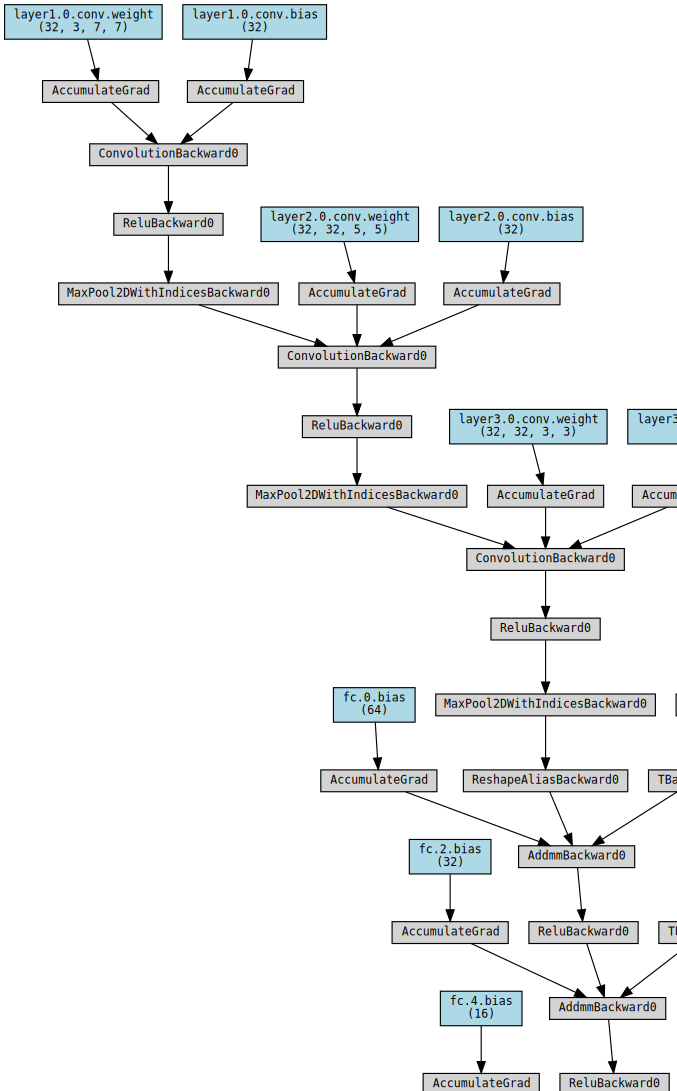

In [39]:
from torchviz import make_dot

# Create an instance of the model
model = DiscriminatorV3()

# Generate a random input tensor with shape (batch_size, channels, height, width)
x = torch.randn(1, 3, 256, 256)

# Pass the input through the model to obtain the output
y = model(x)

# Visualize the computation graph
make_dot(y, params=dict(model.named_parameters()))

In [40]:
from torchsummary import summary
from torchsummary import summary

model = DiscriminatorV3()
summary(model, (3, 256, 256))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

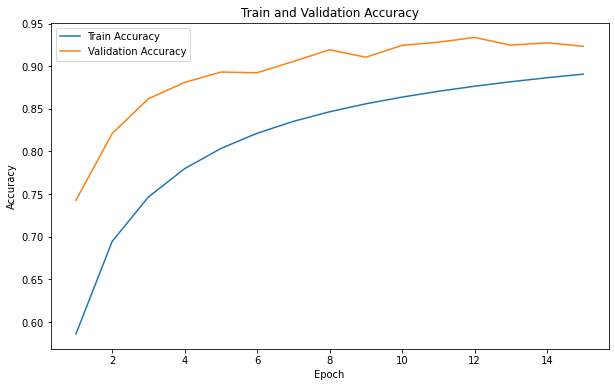

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv("outputs/accuracies.csv")

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df["epoch"], df["train_acc"], label="Train Accuracy")
ax.plot(df["epoch"], df["val_acc"], label="Validation Accuracy")

# set the x and y axis labels
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")

# set the title and legend
ax.set_title("Train and Validation Accuracy")
ax.legend()

# show the plot
plt.show()

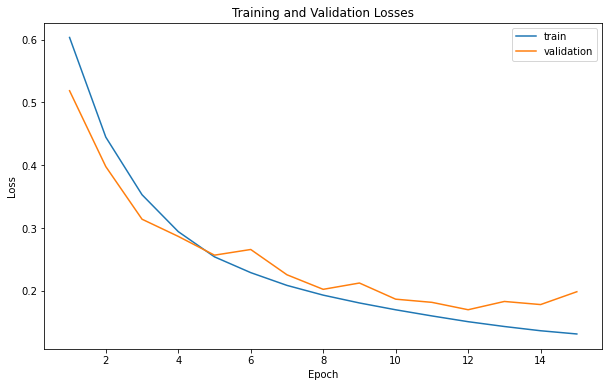

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# read the losses from the CSV file
losses_df = pd.read_csv('outputs/losses.csv')

# plot the train and val losses
plt.plot(losses_df['epoch'], losses_df['train_loss'], label='train')
plt.plot(losses_df['epoch'], losses_df['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.gcf().set_size_inches(10, 6)
plt.show()

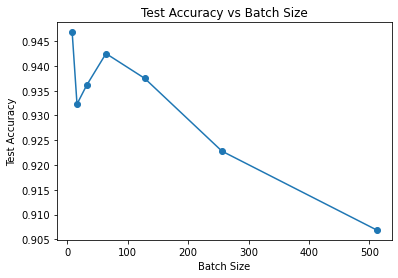

In [46]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_acc = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.plot(batch_sizes, test_acc, '-o')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')
plt.show()

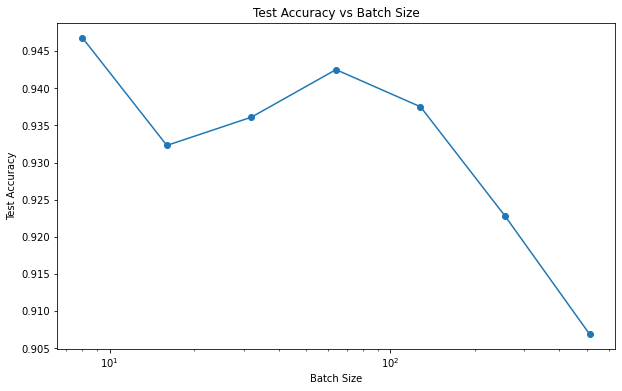

In [48]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_accs = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.semilogx(batch_sizes, test_accs, marker='o')
plt.title('Test Accuracy vs Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.gcf().set_size_inches(10, 6)
plt.show()

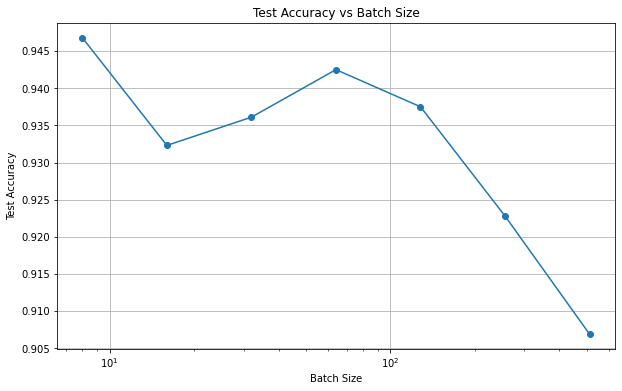

In [50]:
import matplotlib.pyplot as plt

batch_sizes = [512, 256, 128, 64, 32, 16, 8]
test_accs = [0.9069, 0.9228, 0.9375, 0.9425, 0.9361, 0.9323, 0.9468]

plt.plot(batch_sizes, test_accs, marker='o')
plt.xscale('log')
plt.xlabel('Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Batch Size')
plt.grid(True)
plt.gcf().set_size_inches(10, 6)
plt.show()